## Confusion matrix of bounding boxes count

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [45]:
os.listdir("./images/data")

['train_labels.csv',
 'test_labels.csv',
 'train.record',
 'object-detection.pbtxt',
 'test.record',
 'validation_labels.csv']

In [46]:
ssd_bnd_boxes = pd.read_csv("./outputs/ssd_mobile_bounding_boxes_count.csv").sort_values(by="img_name", ascending=True)
fast_rcnn_bnd_boxes = pd.read_csv("./outputs/faster_rcnn_bounding_boxes_count.csv").sort_values(by="img_name", ascending=True)

In [57]:
validation_bnd_boxes = pd.read_csv("./images/data/validation_labels.csv")
validation_bnd_boxes = validation_bnd_boxes.groupby("filename")["height"].count().reset_index().sort_values(by="filename", ascending=True)
validation_bnd_boxes.columns = ["img_name","bnd_bx_count"]

In [58]:
ssd_bnd_boxes = ssd_bnd_boxes[ssd_bnd_boxes["img_name"].isin(validation_bnd_boxes["img_name"])]
fast_rcnn_bnd_boxes = fast_rcnn_bnd_boxes[fast_rcnn_bnd_boxes["img_name"].isin(validation_bnd_boxes["img_name"])]

In [61]:
ssd_conf_mat = confusion_matrix(validation_bnd_boxes["bnd_bx_count"], ssd_bnd_boxes["bnd_bx_count"])
fastrcnn_conf_mat = confusion_matrix(validation_bnd_boxes["bnd_bx_count"], fast_rcnn_bnd_boxes["bnd_bx_count"])

### SSD Mobile Conf Matrix

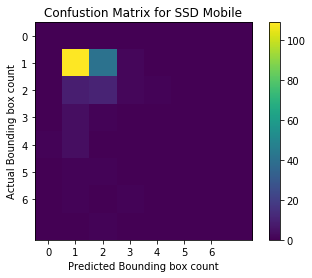

In [90]:
plt.imshow(ssd_conf_mat, interpolation="nearest")
plt.title("Confustion Matrix for SSD Mobile")
plt.colorbar()
ticks = np.arange(7)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel("Actual Bounding box count")
plt.xlabel("Predicted Bounding box count")

plt.show()

In [91]:
ssd_conf_mat

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 109,  41,   2,   0,   0,   0,   0],
       [  0,   9,  11,   2,   1,   0,   0,   0],
       [  0,   4,   1,   0,   0,   0,   0,   0],
       [  1,   4,   0,   0,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,   0,   0],
       [  0,   1,   0,   1,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0]])

In [93]:
correct = 109 + 11 # from diagonal
wrong = sum(sum(ssd_conf_mat)) - correct

print("SSD Mobile Correct: ", correct)
print("SSD Mobile Correct: ", wrong)

SSD Mobile Correct:  120
SSD Mobile Correct:  70


### Faster RCNN Inception V2 Conf Matrix

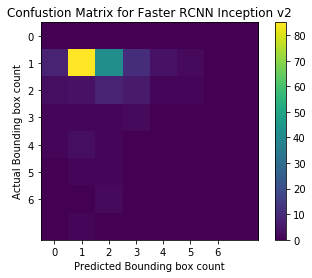

In [84]:
plt.imshow(fastrcnn_conf_mat, interpolation="nearest")#, cmap=plt.cm.gray)
plt.title("Confustion Matrix for Faster RCNN Inception v2")
plt.colorbar()
ticks = np.arange(7)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel("Actual Bounding box count")
plt.xlabel("Predicted Bounding box count")

plt.show()

In [86]:
fastrcnn_conf_mat

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 8, 85, 42, 11,  4,  2,  0,  0],
       [ 3,  4,  8,  6,  1,  1,  0,  0],
       [ 1,  1,  1,  2,  0,  0,  0,  0],
       [ 1,  3,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0]])

In [89]:
correct = 85 + 8 + 2# from diagonal
wrong = sum(sum(fastrcnn_conf_mat)) - correct

print("Faster RCNN Correct: ", correct)
print("Faster RCNN Correct: ", wrong)

Faster RCNN Correct:  95
Faster RCNN Correct:  95
